<center>

#  TFM GRUPO 5: Treatwell Churn Model

</center>

---

- Arnau Andrews Alés
- Bruno Pedemonte Vazquez
- Camila Silva Millones
- Oriol Masias Vegés

---
<center>
IL3-UB: Máster en Big Data & Data Science
</center>

## Objetivo

Desarrollar un **Modelo de Churn** para la empresa **Treatwell Spain SL** que permita identificar los factores que influyen en la cancelación de los salones después de utilizar los servicios de la plataforma.

## Justificación

Desarrollar un **Modelo de Churn** para la empresa **Treatwell Spain SL** que permita identificar los factores que influyen en la cancelación de los salones después de utilizar los servicios de la plataforma. Al conocer las razones detrás de la pérdida de salones, la empresa podrá implementar medidas preventivas para retener a los salones actuales y mejorar su satisfacción y experiencia en la plataforma.

Además, la implementación de este modelo también es crucial para optimizar las estrategias de **adquisición de salones** de Treatwell, ya que permite enfocarse en los salones con mayor probabilidad de permanecer en la plataforma por un período prolongado. Esto puede tener un impacto significativo en la **rentabilidad de la empresa**, ya que retener a los salones existentes resulta más económico que adquirir nuevos.

En conclusión, la creación de un Modelo de Churn permitirá a Treatwell **mejorar la satisfacción** de los salones, **retener a los salones** existentes, **atraer a nuevos salones** y, así, mejorar la **rentabilidad de la empresa**.

## Antecedentes

**Treatwell Spain SL**, es una empresa de servicios B2B especializada en la gestión de reservas y citas para salones de belleza. Como parte de su visión estratégica, la empresa busca **retener a los salones actuales** y mejorar su experiencia, y así, su satisfacción en la plataforma. Para ello, se ha solicitado el desarrollo de un **modelo de Churn** que permita identificar los factores que influyen en la cancelación de una suscripción y, de esta manera, tomar medidas preventivas.

Además, la implementación de este modelo también permitirá optimizar las estrategias de **adquisición de nuevos salones**. Al identificar los factores que influyen en la cancelación de una suscripción, podrán enfocarse en atraer a salones con mayor probabilidad de permanecer en la plataforma a largo plazo.

## 1.Importar librerías

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings


#from google.colab import drive
#drive.mount('/content/drive')

## 2.Cargar datos

In [2]:
# Cargamos el CSV de los Venues
df_raw_venues = pd.read_csv("venues_2023_22_21.csv", sep="	", decimal=".", low_memory=False)

# Cargamos el CSV de las Orders
df_raw_orders = pd.read_csv("orders_2023_22_21.csv", sep="	", decimal=".", low_memory=False)

In [3]:
# Copiamos los CSV para mantener los datos intactos
df_venues = df_raw_venues.copy()
df_orders = df_raw_orders.copy()

## 3.Visualizar los datos

In [4]:
df_venues.head()

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_from,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.650000000000002,false
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.650000000000002,false
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.650000000000002,false
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.650000000000002,false
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.650000000000002,false


In [5]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606923 entries, 0 to 4606922
Data columns (total 36 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   date_day                              object
 1   unique_venue_id                       int64 
 2   created                               object
 3   venue_status                          object
 4   venue_active_from                     object
 5   original_marketplace_venue_type_name  object
 6   country_code                          object
 7   tier                                  object
 8   saas_product                          object
 9   first_live_date                       object
 10  latest_live_date                      object
 11  disabled_date                         object
 12  reactivated_status                    object
 13  is_twconnect_migrated                 bool  
 14  is_purchasable                        object
 15  is_widget_enabled               

In [6]:
df_orders.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
0,12000021750,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_pro,4,120.00,30.000000,0.00,0.0,1,30.0,30.0,0.0,0.0
1,11000386404,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_connect,561,16025.01,28.565080,0.00,0.0,47,1298.0,27.617021276595743,0.0,0.0
2,11000380037,2022.0,11.0,Widget,4.Loyal,iDeal_intent,tw_connect,18,872.00,48.444444,17.44,0.02,2,113.0,56.5,2.26,0.019999999999999997
3,11000400421,2022.0,10.0,Marketplace,4.Loyal,PayPal,tw_connect,12,622.30,51.858333,12.46,0.020022497187851523,1,145.95,145.95,2.92,0.020006851661527922
4,11000329570,2022.0,11.0,Widget,4.Loyal,PayPal,tw_connect,2,116.24,58.120000,2.34,0.020130763936682727,(null),(null),(null),(null),(null)


In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021752 entries, 0 to 5021751
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   content_channel_name           object 
 4   online_order_segment           object 
 5   payment_method_name            object 
 6   saas_product                   object 
 7   gross_orders                   int64  
 8   gross_item_eur_amount_ttv      float64
 9   gross_aov                      float64
 10  gross_revenue_eur              float64
 11  gross_take_rate                object 
 12  cancelled_orders               object 
 13  cancelled_item_eur_amount_ttv  object 
 14  cancelled_aov                  object 
 15  cancelled_revenue_eur          object 
 16  cancelled_take_rate            object 
dtypes: float64(5), int64(1), object(11)
memory usa

## 4.Transformación inicial de datos

Podemos observar que existen valores **null** que no están en el formato **NaN**. El primer paso consistirá en convertirlos al formato adecuado en ambos datasets.

In [8]:
# Transformamos los strings %null% en valores NaN
df_venues = df_venues.replace(to_replace=r'.*null.*', value=np.nan, regex=True)
df_orders = df_orders.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

In [9]:
# Visualizar el porcentaje de NaNs por variable
print(df_venues.isna().mean()*100)
print()
print(df_orders.isna().mean()*100)

date_day                                 0.000000
unique_venue_id                          0.000000
created                                  0.000000
venue_status                            19.732563
venue_active_from                       92.750519
original_marketplace_venue_type_name     4.861466
country_code                             0.000000
tier                                    49.194441
saas_product                             0.000000
first_live_date                         22.631353
latest_live_date                        23.053565
disabled_date                           73.586947
reactivated_status                       0.000000
is_twconnect_migrated                    0.000000
is_purchasable                          19.732563
is_widget_enabled                       19.732563
is_heavy_saas                           22.859119
first_heavy_saas_date                   98.699370
active_employees                        84.212999
direct_appointments_l30d                22.859119


Vamos a eliminar los registros que tienen **valores NaN en unique_venue_id** ya que se tratan de registros con errores.

In [10]:
# Eliminar las rows con unique_venue_id NaN
df_orders = df_orders[df_orders['unique_venue_id'].notna()]

Ahora crearemos la variable dependiente **Churn** utilizando las siguientes variables:

- latest_live_date
- disabled_date

In [11]:
# Reemplazamos los valores NaN por 0 en latest_live_date
df_venues['disabled_date'].fillna(0, inplace=True)

#Transformamos la variable "disabled_date" a formato fecha
df_venues['disabled_date'] = pd.to_datetime(df_venues['disabled_date'], errors='coerce')

# Eliminar todos los registros que tienen valores NaN en latest_live_date
df_venues.dropna(subset=['latest_live_date'], inplace=True)

#Transformamos la variable "latest_live_date" a formato fecha
df_venues['latest_live_date'] = pd.to_datetime(df_venues['latest_live_date'], errors='coerce')

# Creamos una nueva columna 'mes' a partir de la columna 'date_time'
df_venues['mes'] = df_venues['latest_live_date'].dt.to_period('M')

# Calculamos el churn por cada mes
tres_meses = df_venues['latest_live_date'] + pd.DateOffset(months=3)
df_venues['churn'] = np.where(df_venues['disabled_date'] > tres_meses, 1, 0)

Ahora vamos a modificar el **type** en las variables que sea necesario.

In [12]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544863 entries, 0 to 4606922
Data columns (total 38 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   date_day                              object        
 1   unique_venue_id                       int64         
 2   created                               object        
 3   venue_status                          object        
 4   venue_active_from                     object        
 5   original_marketplace_venue_type_name  object        
 6   country_code                          object        
 7   tier                                  object        
 8   saas_product                          object        
 9   first_live_date                       object        
 10  latest_live_date                      datetime64[ns]
 11  disabled_date                         datetime64[ns]
 12  reactivated_status                    object        
 13  is_twconnect

In [13]:
# Transformamos el "type" de las variables
df_venues['date_day'] = pd.to_datetime(df_venues['date_day'])
df_venues["unique_venue_id"] = df_venues["unique_venue_id"].astype(str)
df_venues['created']= pd.to_datetime(df_venues['created'])
df_venues["venue_status"] = df_venues["venue_status"].astype(str)
df_venues['venue_active_from']= pd.to_datetime(df_venues['venue_active_from'])
df_venues["original_marketplace_venue_type_name"] = df_venues["original_marketplace_venue_type_name"].astype(str)
df_venues["country_code"] = df_venues["country_code"].astype(str)
df_venues["tier"] = df_venues["tier"].astype(str)
df_venues["saas_product"] = df_venues["saas_product"].astype(str)
df_venues['first_live_date'] = pd.to_datetime(df_venues['first_live_date'])
df_venues["reactivated_status"] = df_venues["reactivated_status"].astype(str)
df_venues['is_purchasable'] = df_venues['is_purchasable'].map({'true': True, 'false': False}).astype(bool)
df_venues['is_widget_enabled'] = df_venues['is_widget_enabled'].map({'true': True, 'false': False}).astype(bool)
df_venues['is_heavy_saas'] = df_venues['is_heavy_saas'].map({'true': True, 'false': False}).astype(bool)
df_venues['first_heavy_saas_date'] = pd.to_datetime(df_venues['first_heavy_saas_date'])
df_venues['active_employees'] = df_venues['active_employees'].astype(pd.Int64Dtype())
df_venues['direct_appointments_l30d'] = df_venues['direct_appointments_l30d'].astype(pd.Int64Dtype())
df_venues["online_appointments_l30d"] = df_venues["online_appointments_l30d"].astype(pd.Int64Dtype())
df_venues['is_tw_mp_listed'] = df_venues['is_tw_mp_listed'].map({'true': True, 'false': False}).astype(bool)
df_venues['tw_mp_listed_first_time_date'] = pd.to_datetime(df_venues['tw_mp_listed_first_time_date'])
df_venues["marketplace_payment_method"] = df_venues["marketplace_payment_method"].astype(str)
df_venues["widget_payment_method"] = df_venues["widget_payment_method"].astype(str)
df_venues['is_plan_trial'] = df_venues['is_plan_trial'].map({'true': True, 'false': False}).astype(bool)
df_venues['plan_active_from']= pd.to_datetime(df_venues['plan_active_from'])
df_venues['plan_active_to'] = pd.to_datetime(df_venues['plan_active_to'], errors='coerce')
df_venues['prepay'] = df_venues['prepay'].astype(float)
df_venues['prepaid_until_to']= pd.to_datetime(df_venues['prepaid_until_to'])
df_venues['discount'] = df_venues['discount'].astype(float)
df_venues['plan_discount_end_date']= pd.to_datetime(df_venues['plan_discount_end_date'])
df_venues["plan_name"] = df_venues["plan_name"].astype(str)
df_venues['plan_fee_eur'] = df_venues['plan_fee_eur'].astype(float)
df_venues['is_zero_commission_plan'] = df_venues['is_zero_commission_plan'].map({'true': True, 'false': False}).astype(bool)

# Visualizar el porcentaje de NaNs por variable
df_venues.isna().mean()*100

date_day                                 0.000000
unique_venue_id                          0.000000
created                                  0.000000
venue_status                             0.000000
venue_active_from                       90.586435
original_marketplace_venue_type_name     0.000000
country_code                             0.000000
tier                                     0.000000
saas_product                             0.000000
first_live_date                          0.021101
latest_live_date                         0.000000
disabled_date                            0.000000
reactivated_status                       0.000000
is_twconnect_migrated                    0.000000
is_purchasable                           0.000000
is_widget_enabled                        0.000000
is_heavy_saas                            0.000000
first_heavy_saas_date                   98.423550
active_employees                        80.052346
direct_appointments_l30d                22.439852


In [14]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020284 entries, 0 to 5021751
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   content_channel_name           object 
 4   online_order_segment           object 
 5   payment_method_name            object 
 6   saas_product                   object 
 7   gross_orders                   int64  
 8   gross_item_eur_amount_ttv      float64
 9   gross_aov                      float64
 10  gross_revenue_eur              float64
 11  gross_take_rate                object 
 12  cancelled_orders               object 
 13  cancelled_item_eur_amount_ttv  object 
 14  cancelled_aov                  object 
 15  cancelled_revenue_eur          object 
 16  cancelled_take_rate            object 
dtypes: float64(5), int64(1), object(11)
memory usa

In [15]:
# Transformamos el "type" de las variables
df_orders["unique_venue_id"] = df_orders["unique_venue_id"].astype(str)
df_orders["content_channel_name"] = df_orders["content_channel_name"].astype(str)
df_orders["online_order_segment"] = df_orders["online_order_segment"].astype(str)
df_orders["payment_method_name"] = df_orders["payment_method_name"].astype(str)
df_orders["saas_product"] = df_orders["saas_product"].astype(str)
df_orders['gross_orders'] = df_orders['gross_orders'].astype(float)
df_orders['gross_take_rate'] = df_orders['gross_take_rate'].astype(float)
df_orders['cancelled_orders'] = df_orders['cancelled_orders'].astype(pd.Int64Dtype())
df_orders['cancelled_item_eur_amount_ttv'] = df_orders['cancelled_item_eur_amount_ttv'].astype(float)
df_orders['cancelled_aov'] = df_orders['cancelled_aov'].astype(float)
df_orders['cancelled_revenue_eur'] = df_orders['cancelled_revenue_eur'].astype(float)
df_orders['cancelled_take_rate'] = df_orders['cancelled_take_rate'].astype(float)

# Visualizar el porcentaje de NaNs por variable
df_orders.isna().mean()*100

unique_venue_id                   0.000000
year                              0.000000
month                             0.000000
content_channel_name              0.000000
online_order_segment              0.000000
payment_method_name               0.000000
saas_product                      0.000000
gross_orders                      0.000000
gross_item_eur_amount_ttv         0.000000
gross_aov                         0.000000
gross_revenue_eur                 0.000000
gross_take_rate                   1.242878
cancelled_orders                 64.859279
cancelled_item_eur_amount_ttv    64.859279
cancelled_aov                    64.859279
cancelled_revenue_eur            64.859279
cancelled_take_rate              64.881967
dtype: float64

Vamos a **descartar** las siguientes variables ya que tienen una alta cantidad de **valores NaN**:

- venue_active_from
- tier
- active_employees
- plan_active_from

In [16]:
# Eliminar las variables con exceso de valores NaN
df_venues = df_venues.drop("venue_active_from", axis=1)
df_venues = df_venues.drop("tier", axis=1)
df_venues = df_venues.drop("active_employees", axis=1)
df_venues = df_venues.drop("plan_active_from", axis=1)

Además, también hemos detectado que tenemos variables con **valores NaN** que deberían ser **valores = 0**.

- cancelled_orders
- cancelled_item_eur_amount_ttv
- cancelled_aov
- cancelled_revenue_eur
- cancelled_take_rate

In [17]:
# Sustituir valores NaN por 0
df_orders.cancelled_orders.fillna(0, inplace=True)
df_orders.cancelled_item_eur_amount_ttv.fillna(0, inplace=True)
df_orders.cancelled_aov.fillna(0, inplace=True)
df_orders.cancelled_revenue_eur.fillna(0, inplace=True)
df_orders.cancelled_take_rate.fillna(0, inplace=True)
df_orders.gross_take_rate.fillna(0, inplace=True)

## 5.Análisis unidimensional de las variables (EDA)

### Dataset Venues

#### Variables Booleanas

In [18]:
venues_bool = df_venues[["is_twconnect_migrated", "is_purchasable", "is_widget_enabled", "is_heavy_saas", "is_tw_mp_listed", "is_plan_trial", "prepay", "discount", "is_zero_commission_plan"]]

print("Porcentaje de valores NaN:")
print(venues_bool.isna().mean()*100)
print()

for column in venues_bool:
    unique_values = df_venues[column].unique()
    print("Valores únicos de la variable '{}':".format(column))
    print(unique_values)
    print()

Porcentaje de valores NaN:
is_twconnect_migrated      0.0
is_purchasable             0.0
is_widget_enabled          0.0
is_heavy_saas              0.0
is_tw_mp_listed            0.0
is_plan_trial              0.0
prepay                     0.0
discount                   0.0
is_zero_commission_plan    0.0
dtype: float64

Valores únicos de la variable 'is_twconnect_migrated':
[False  True]

Valores únicos de la variable 'is_purchasable':
[False  True]

Valores únicos de la variable 'is_widget_enabled':
[False  True]

Valores únicos de la variable 'is_heavy_saas':
[ True False]

Valores únicos de la variable 'is_tw_mp_listed':
[ True False]

Valores únicos de la variable 'is_plan_trial':
[False  True]

Valores únicos de la variable 'prepay':
[0. 1.]

Valores únicos de la variable 'discount':
[0. 1.]

Valores únicos de la variable 'is_zero_commission_plan':
[False  True]



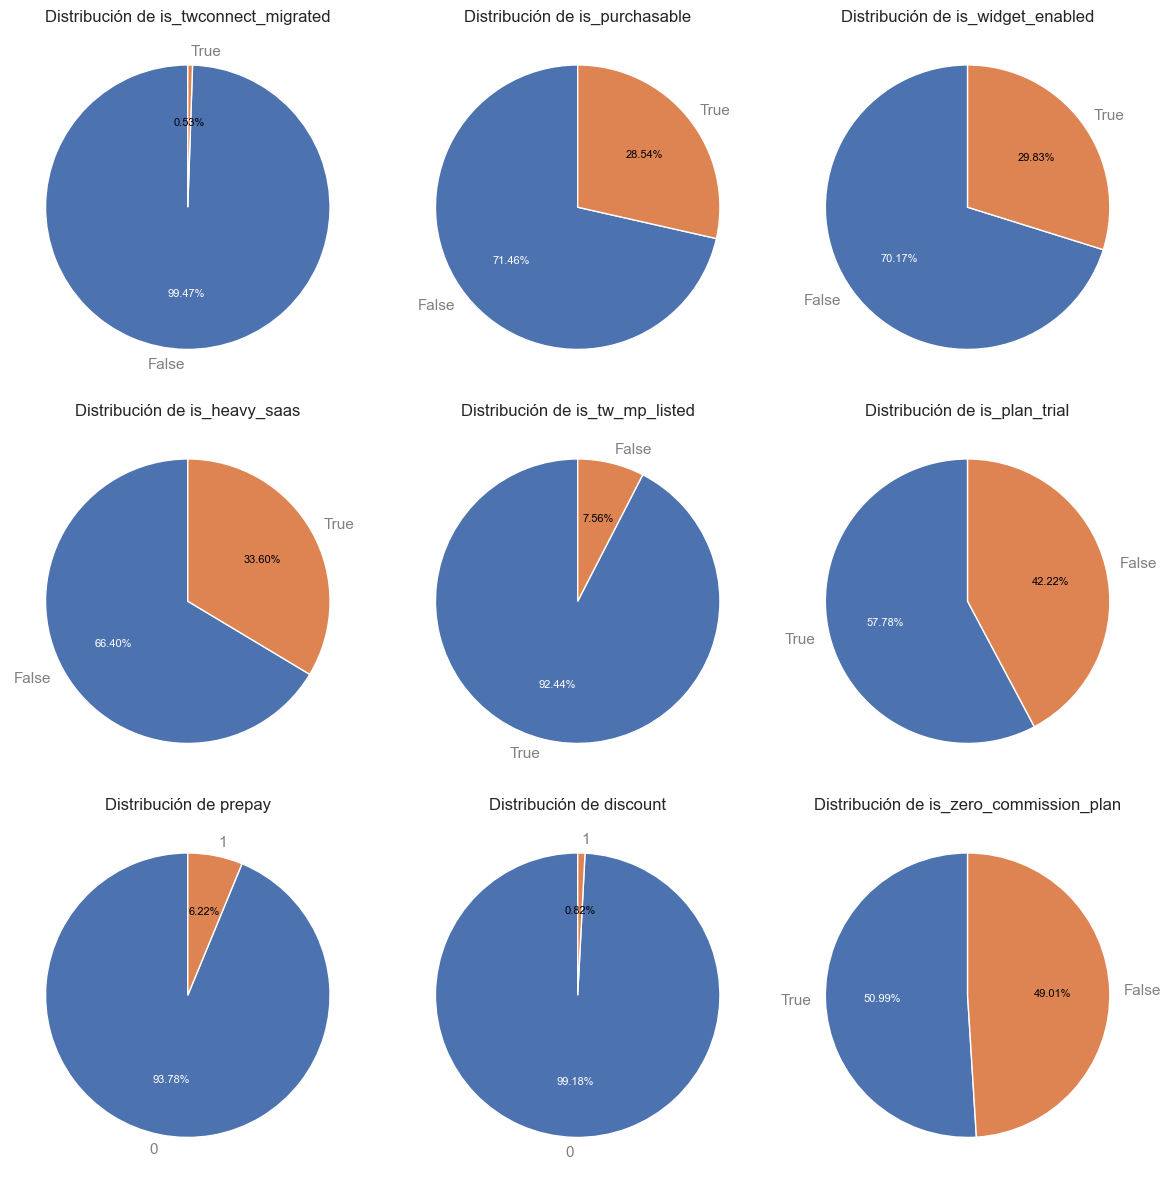

In [19]:
# Crear el conjunto de figuras
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12, 12))

# Crear el gráfico de la variable is_twconnect_migrated
patches, texts, autotexts = ax1.pie(df_venues.is_twconnect_migrated.value_counts(), labels=["False", "True"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax1.set_title("Distribución de is_twconnect_migrated")

# Crear el gráfico de la variable is_purchasable
patches, texts, autotexts = ax2.pie(df_venues.is_purchasable.value_counts(), labels=["False", "True"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax2.set_title("Distribución de is_purchasable")

# Crear el gráfico de la variable is_widget_enabled
patches, texts, autotexts = ax3.pie(df_venues.is_widget_enabled.value_counts(), labels=["False", "True"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax3.set_title("Distribución de is_widget_enabled")

# Crear el gráfico de la variable is_heavy_saas
patches, texts, autotexts = ax4.pie(df_venues.is_heavy_saas.value_counts(), labels=["False", "True"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax4.set_title("Distribución de is_heavy_saas")

# Crear el gráfico de la variable is_tw_mp_listed
patches, texts, autotexts = ax5.pie(df_venues.is_tw_mp_listed.value_counts(), labels=["True", "False"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax5.set_title("Distribución de is_tw_mp_listed")

# Crear el gráfico de la variable is_plan_trial
patches, texts, autotexts = ax6.pie(df_venues.is_plan_trial.value_counts(), labels=["True", "False"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax6.set_title("Distribución de is_plan_trial")

# Crear el gráfico de la variable prepay
patches, texts, autotexts = ax7.pie(df_venues.prepay.value_counts(), labels=["0", "1"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax7.set_title("Distribución de prepay")

# Crear el gráfico de la variable discount
patches, texts, autotexts = ax8.pie(df_venues.discount.value_counts(), labels=["0", "1"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax8.set_title("Distribución de discount")

# Crear el gráfico de la variable is_zero_commission_plan
patches, texts, autotexts = ax9.pie(df_venues.is_zero_commission_plan.value_counts(), labels=["True", "False"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax9.set_title("Distribución de is_zero_commission_plan")

# Ajustar el diseño de la figura
fig.tight_layout()

Eliminaremos las siguientes variables:
- **is_twconnect_migrated:** Es una variable irrelevante para el modelo y menos del 1% son valores "True".
- **is_plan_trial:** Es una variable irrelevante para el modelo ya que utilizaremos **date_day y latest_live_date** para caluclar la antiguedad de cada venue.
- **discount:** Es una variable irrelevante para el modelo y menos del 1% son valores "True".
- **is_zero_commission_plan:** Es una variable irrelevante para el modelo ya que utilizaremos **is_tw_mp_listed**.

In [20]:
df_venues = df_venues.drop("is_twconnect_migrated", axis=1)
df_venues = df_venues.drop("is_plan_trial", axis=1)
df_venues = df_venues.drop("discount", axis=1)
df_venues = df_venues.drop("is_zero_commission_plan", axis=1)

#### Variables Categóricas

In [21]:
venues_cat = df_venues[["venue_status", "original_marketplace_venue_type_name", "country_code", "saas_product", "reactivated_status",
                        "marketplace_payment_method", "widget_payment_method", "bill_every", "plan_name"]]

print("Porcentaje de valores NaN:")
print(venues_cat.isnull().mean()*100)
print()

for column in venues_cat:
    unique_values = df_venues[column].unique()
    print("Valores únicos de la variable '{}':".format(column))
    print(unique_values)
    print()

Porcentaje de valores NaN:
venue_status                             0.000000
original_marketplace_venue_type_name     0.000000
country_code                             0.000000
saas_product                             0.000000
reactivated_status                       0.000000
marketplace_payment_method               0.000000
widget_payment_method                    0.000000
bill_every                              42.153449
plan_name                                0.000000
dtype: float64

Valores únicos de la variable 'venue_status':
['DISABLED' 'nan' 'LIVE' 'ARCHIVED' 'PENDING']

Valores únicos de la variable 'original_marketplace_venue_type_name':
['Hotel Spa' 'Day Spa' 'Beauty Salon' 'Skin Clinic' 'Tanning Salon'
 'Medical Spa' 'Hair Salon' 'Destination Spa' 'Nail Salon'
 'Fitness Centre' 'Barbershop' 'Treatment Room - Beauty'
 'Treatment Room - Wellness' 'Massage & Therapy Centre' 'Brow Bar'
 'Yoga Studio' 'Treatment Room - Spa' 'Wellness Centre' 'Waxing Salon'
 'Pilates Studio' 'Mo

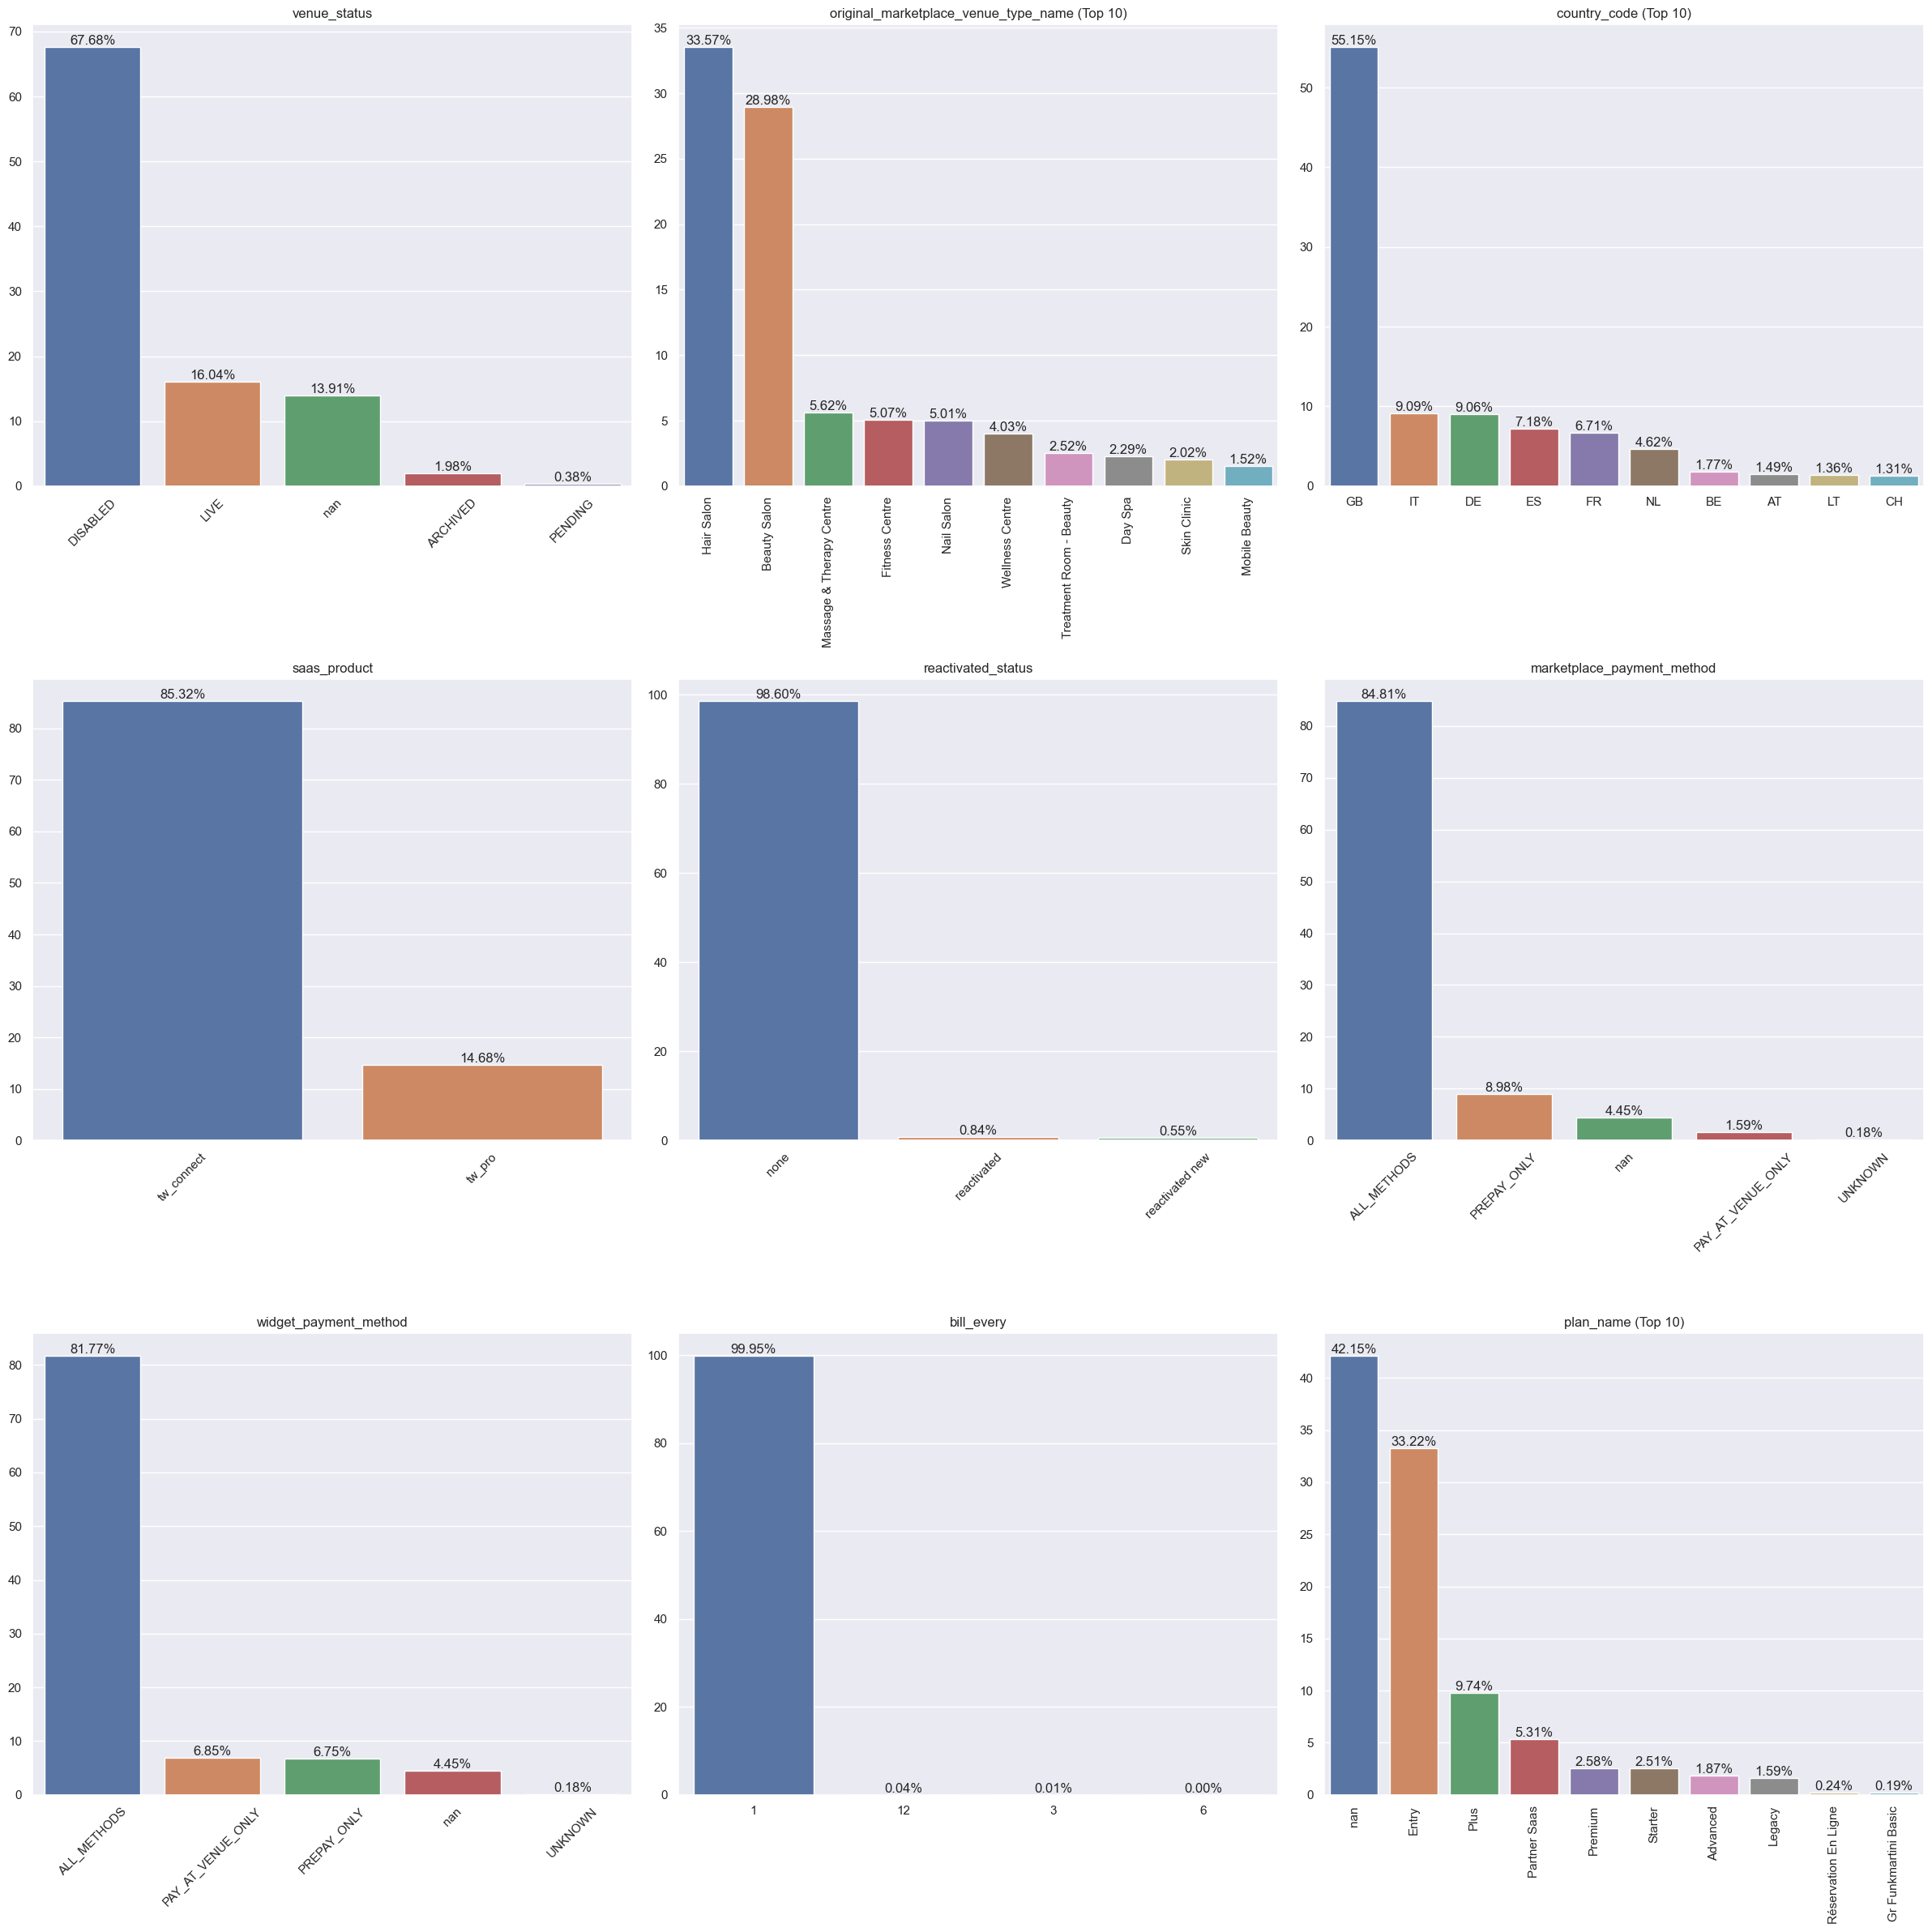

In [22]:
# Crear el conjunto de figuras
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(24, 24))

# Crear el gráfico de la variable venue_status
venue_status = df_venues['venue_status'].value_counts(normalize=True) * 100
sns.barplot(x=venue_status.index, y=venue_status.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("venue_status")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable original_marketplace_venue_type_name
original_marketplace_venue_type_name = df_venues['original_marketplace_venue_type_name'].value_counts(normalize=True) * 100
top_10_categories = original_marketplace_venue_type_name[:10]
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("original_marketplace_venue_type_name (Top 10)")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable country_code
country_code = df_venues['country_code'].value_counts(normalize=True) * 100
top_10_categories = country_code[:10]
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_title("country_code (Top 10)")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable saas_product
saas_product = df_venues['saas_product'].value_counts(normalize=True) * 100
sns.barplot(x=saas_product.index, y=saas_product.values, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_title("saas_product")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable reactivated_status
reactivated_status = df_venues['reactivated_status'].value_counts(normalize=True) * 100
sns.barplot(x=reactivated_status.index, y=reactivated_status.values, ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
ax5.set_title("reactivated_status")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable marketplace_payment_method
marketplace_payment_method = df_venues['marketplace_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=marketplace_payment_method.index, y=marketplace_payment_method.values, ax=ax6)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
ax6.set_title("marketplace_payment_method")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable widget_payment_method
widget_payment_method = df_venues['widget_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=widget_payment_method.index, y=widget_payment_method.values, ax=ax7)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45)
ax7.set_title("widget_payment_method")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax7.patches:
    height = p.get_height()
    ax7.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable bill_every
bill_every = df_venues['bill_every'].value_counts(normalize=True) * 100
sns.barplot(x=bill_every.index, y=bill_every.values, ax=ax8)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=0)
ax8.set_title("bill_every")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax8.patches:
    height = p.get_height()
    ax8.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable plan_name
plan_name = df_venues['plan_name'].value_counts(normalize=True) * 100
top_10_categories = plan_name[:10]
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, ax=ax9)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=90)
ax9.set_title("plan_name (Top 10)")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax9.patches:
    height = p.get_height()
    ax9.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Ajustar el diseño de la figura
fig.tight_layout()

Eliminaremos las siguientes variables:

- **venue_status:**
- **reactivated_status:** Es una variable irrelevante para el modelo ya que está muy descompensada y utilizaremos **first_live_date, latest_live_date y disabled_date** para saber si una venue está reactivada.
- **bill_every:** Es una variable irrelevante para el modelo ya que está muy descompensada.

In [23]:
df_venues = df_venues.drop("venue_status", axis=1)
df_venues = df_venues.drop("reactivated_status", axis=1)
df_venues = df_venues.drop("bill_every", axis=1)

Hacemos mapping de la variable **plan_name**:
* Observamos las valores de la variable
* Mapeamos

In [24]:
df_venues.plan_name.value_counts()

nan                                     1494282
Entry                                   1177520
Plus                                     345390
Partner Saas                             188368
Premium                                   91468
Starter                                   89056
Advanced                                  66217
Legacy                                    56450
Réservation En Ligne                       8524
Gr Funkmartini Basic                       6738
Gr Funkmartini Gold                        5682
Vetrina + Agenda                           3988
Gestion + Réservation En Ligne             3747
Global                                     2660
Trial                                      1743
Réservation En Ligne + Site Internet       1503
Fr Uala Marketplace                         468
Gestion                                     361
Site Internet Only                          236
Uk Churned Venue                            146
Gestion + Site Internet                 

In [25]:
# Create a dictionary to map product names to billing product names
mapping = {'Entry':'Entry',
           'Plus':'Plus',
           'Partner Saas':'Partner Saas',
           'Premium': 'Premium',
           'Starter': 'Starter',
           'Advanced': 'Advanced',
           'Legacy':'Legacy',
           'Réservation En Ligne':'Starter',
           'Gr Funkmartini Basic':'Starter',
           'Gr Funkmartini Gold':'Advanced',
           'Vetrina + Agenda':'Advanced',
           'Gestion + Réservation En Ligne':'Premium',
           'Global':'Premium',
           'Trial':'Starter',
           'Réservation En Ligne + Site Internet':'Advanced',
           'Fr Uala Marketplace':'Advanced',
           'Gestion': 'Premium',
           'Site Internet Only ':'Starter',
           'Uk Churned Venue':'Churned',
           'Gestion + Site Internet ':'Premium',
           'Es Churned Venue':'Churned',
           'Fr Churned Venue':'Churned',
           'Costo Servizio Di Prenotazione':'Starter',
           'Gestionale':'Premium',
           'Es Free':'Starter',
           'De Churned Venue':'Churned',
           'Dead':'Churned',
           'It Churned Venue':'Churned',
           'Pt Basic':'Starter',
           'It Free':'Starter',
           'Saas Kadus':'Partner Saas',
           'Fr Uala Free':'Starter',
           'Comisiones':'Starter'
           }

# Create a new column 'billing_product_name' by mapping the product names
df_venues['plan_name'] = df_venues['plan_name'].map(mapping)

# Value Counts
df_venues.plan_name.value_counts()

Entry           1177520
Plus             345390
Partner Saas     188371
Starter          106146
Premium           98265
Advanced          77858
Legacy            56450
Churned             278
Name: plan_name, dtype: int64

Marketplace Venue Type Name: A new field has been added to Venue 3.0. This represents the static venue type as allocated to a venue on the TW Marketplace.

Changes:
* Salons with %Spa% in their names now will be shown as Spa Salons
* Beauty Salon now groups: Wellness Centre, Beauty School, Beauty Institute, Treatment Room - Beauty, Mobile Beauty and Home-based Venue
* Null Values will be map as Beauty Salons.
* Body Salon now groups: Fitness Centre, Yoga Studio, Mobile Fitness, Gym, Bootcamp, Yoga Retreat, Fat Farm, Health Farm, Pilates Studio, Tennis Court, Golf Course, Swimming Pool, Dance Studio, Tanning Salon, Martial Arts Centre, Golf Range, Weight Loss Clinic, Nutrition Centre, Surf School and Health Club.
* Face Salon now groups: Brow Bar and Makeup Studio.
* Hair Removal Salon is the new name for Waxing Salon.
* Massage Salon now groups: Chiropody Clinic, Treatment Room - Wellness, Massage & Therapy Centre, Chiropractic Clinic and Mobile Massage.
* Medical & Dental is the new name for Eye Clinic.
* Dental Clinic, Hair Salon, Nail Salon and Skin Clinic keeps their names
* Other Salon now groups: Online Retailer and Photographic Studio.


All the changes were defined by the order distribution of the salons.




#### Variables Numéricas

Descartaremos las siguientes variables directamente:

- **created:** Es una variable irrelevante para el modelo y utilizaremos **latest_live_date** para recrear la antiguedad.
- **first_live_date:** Es una variable irrelevante para el modelo ya que por si sola no nos aporta información.
- **disabled_date:** Es una variable irrelevante para el modelo ya que por si sola no nos aporta información.
- **first_heavy_saas_date:** Es una variable irrelevante para el modelo y utilizaremos **is_heavy_saas** para classificar las venues.
- **tw_mp_listed_first_time_date:** Es una variable irrelevante para el modelo y utilizaremos **is_tw_mp_listed** para classificar las venues.

In [26]:
# Eliminar las variables descartadas
df_venues = df_venues.drop("created", axis=1)
df_venues = df_venues.drop("first_live_date", axis=1)
df_venues = df_venues.drop("disabled_date", axis=1)
df_venues = df_venues.drop("first_heavy_saas_date", axis=1)
df_venues = df_venues.drop("tw_mp_listed_first_time_date", axis=1)

Ahora vamos a combinar y transofrmar las variables **direct_appointments_l30d** y **online_appointments_l30d** para obtener más información:

- En primer lugar, crearemos la variable **appointments_l30d**, que contendrá la información conjunta de las dos variables anteriores.
- En segundo lugar, crearemos la variable **%online_appointments**, que contendrá el porcentaje de los appointments que son online.

In [27]:
# Crear la variable appointments_l30d
df_venues["appointments_l30d"] = df_venues["direct_appointments_l30d"] + df_venues["online_appointments_l30d"]

# Crear la variable %online_appointments
df_venues["%online_appointments"] = round(df_venues["online_appointments_l30d"]/df_venues["appointments_l30d"], 2)
df_venues.loc[df_venues["online_appointments_l30d"] == 0, "%online_appointments"] = 0

# Eliminar las otras variables
df_venues = df_venues.drop("direct_appointments_l30d", axis=1)
df_venues = df_venues.drop("online_appointments_l30d", axis=1)

Ahora vamos a analizar las variables numéricas.

In [28]:
venues_num = df_venues[["date_day", "unique_venue_id", "appointments_l30d", "%online_appointments",
                        "plan_active_to", "prepaid_until_to", "plan_discount_end_date", "plan_fee_eur"]]

print("Porcentaje de valores NaN:")
print(venues_num.isna().mean()*100)
print()

venues_num.describe()

Porcentaje de valores NaN:
date_day                   0.000000
unique_venue_id            0.000000
appointments_l30d         22.439852
%online_appointments      22.439852
plan_active_to            96.274045
prepaid_until_to          92.955920
plan_discount_end_date    99.178755
plan_fee_eur              42.154126
dtype: float64



,appointments_l30d,%online_appointments,plan_fee_eur
count,2749401.0,2749401.0,2.050557e+06
mean,71.516485,0.099337,2.335676e+01
std,239.561064,0.258375,1.772510e+01
min,0.0,0.0,0.000000e+00
25%,0.0,0.0,1.500000e+01
50%,0.0,0.0,1.738650e+01
75%,0.0,0.0,2.900000e+01
max,21507.0,1.0,8.280000e+02


Eliminaremos las siguientes variables:

- **plan_active_to:** Es una variable irrelevante para el modelo ya que utilizaremos **seniority** para obtener la antiguedad de la venue.
- **prepaid_until_to:** No utilizaremos esta variable ya que es irrelevante para el modelo y tiene un alto porcentajes de valores NaN.
- **plan_discount_end_date:** No utilizaremos esta variable ya que es irrelevante para el modelo y tiene un alto porcentajes de valores NaN.
- **plan_fee_eur:** Es una variable irrelevante para el modelo.

In [29]:
# Eliminar las variables
df_venues = df_venues.drop("plan_active_to", axis=1)
df_venues = df_venues.drop("prepaid_until_to", axis=1)
df_venues = df_venues.drop("plan_discount_end_date", axis=1)
df_venues = df_venues.drop("plan_fee_eur", axis=1)

/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

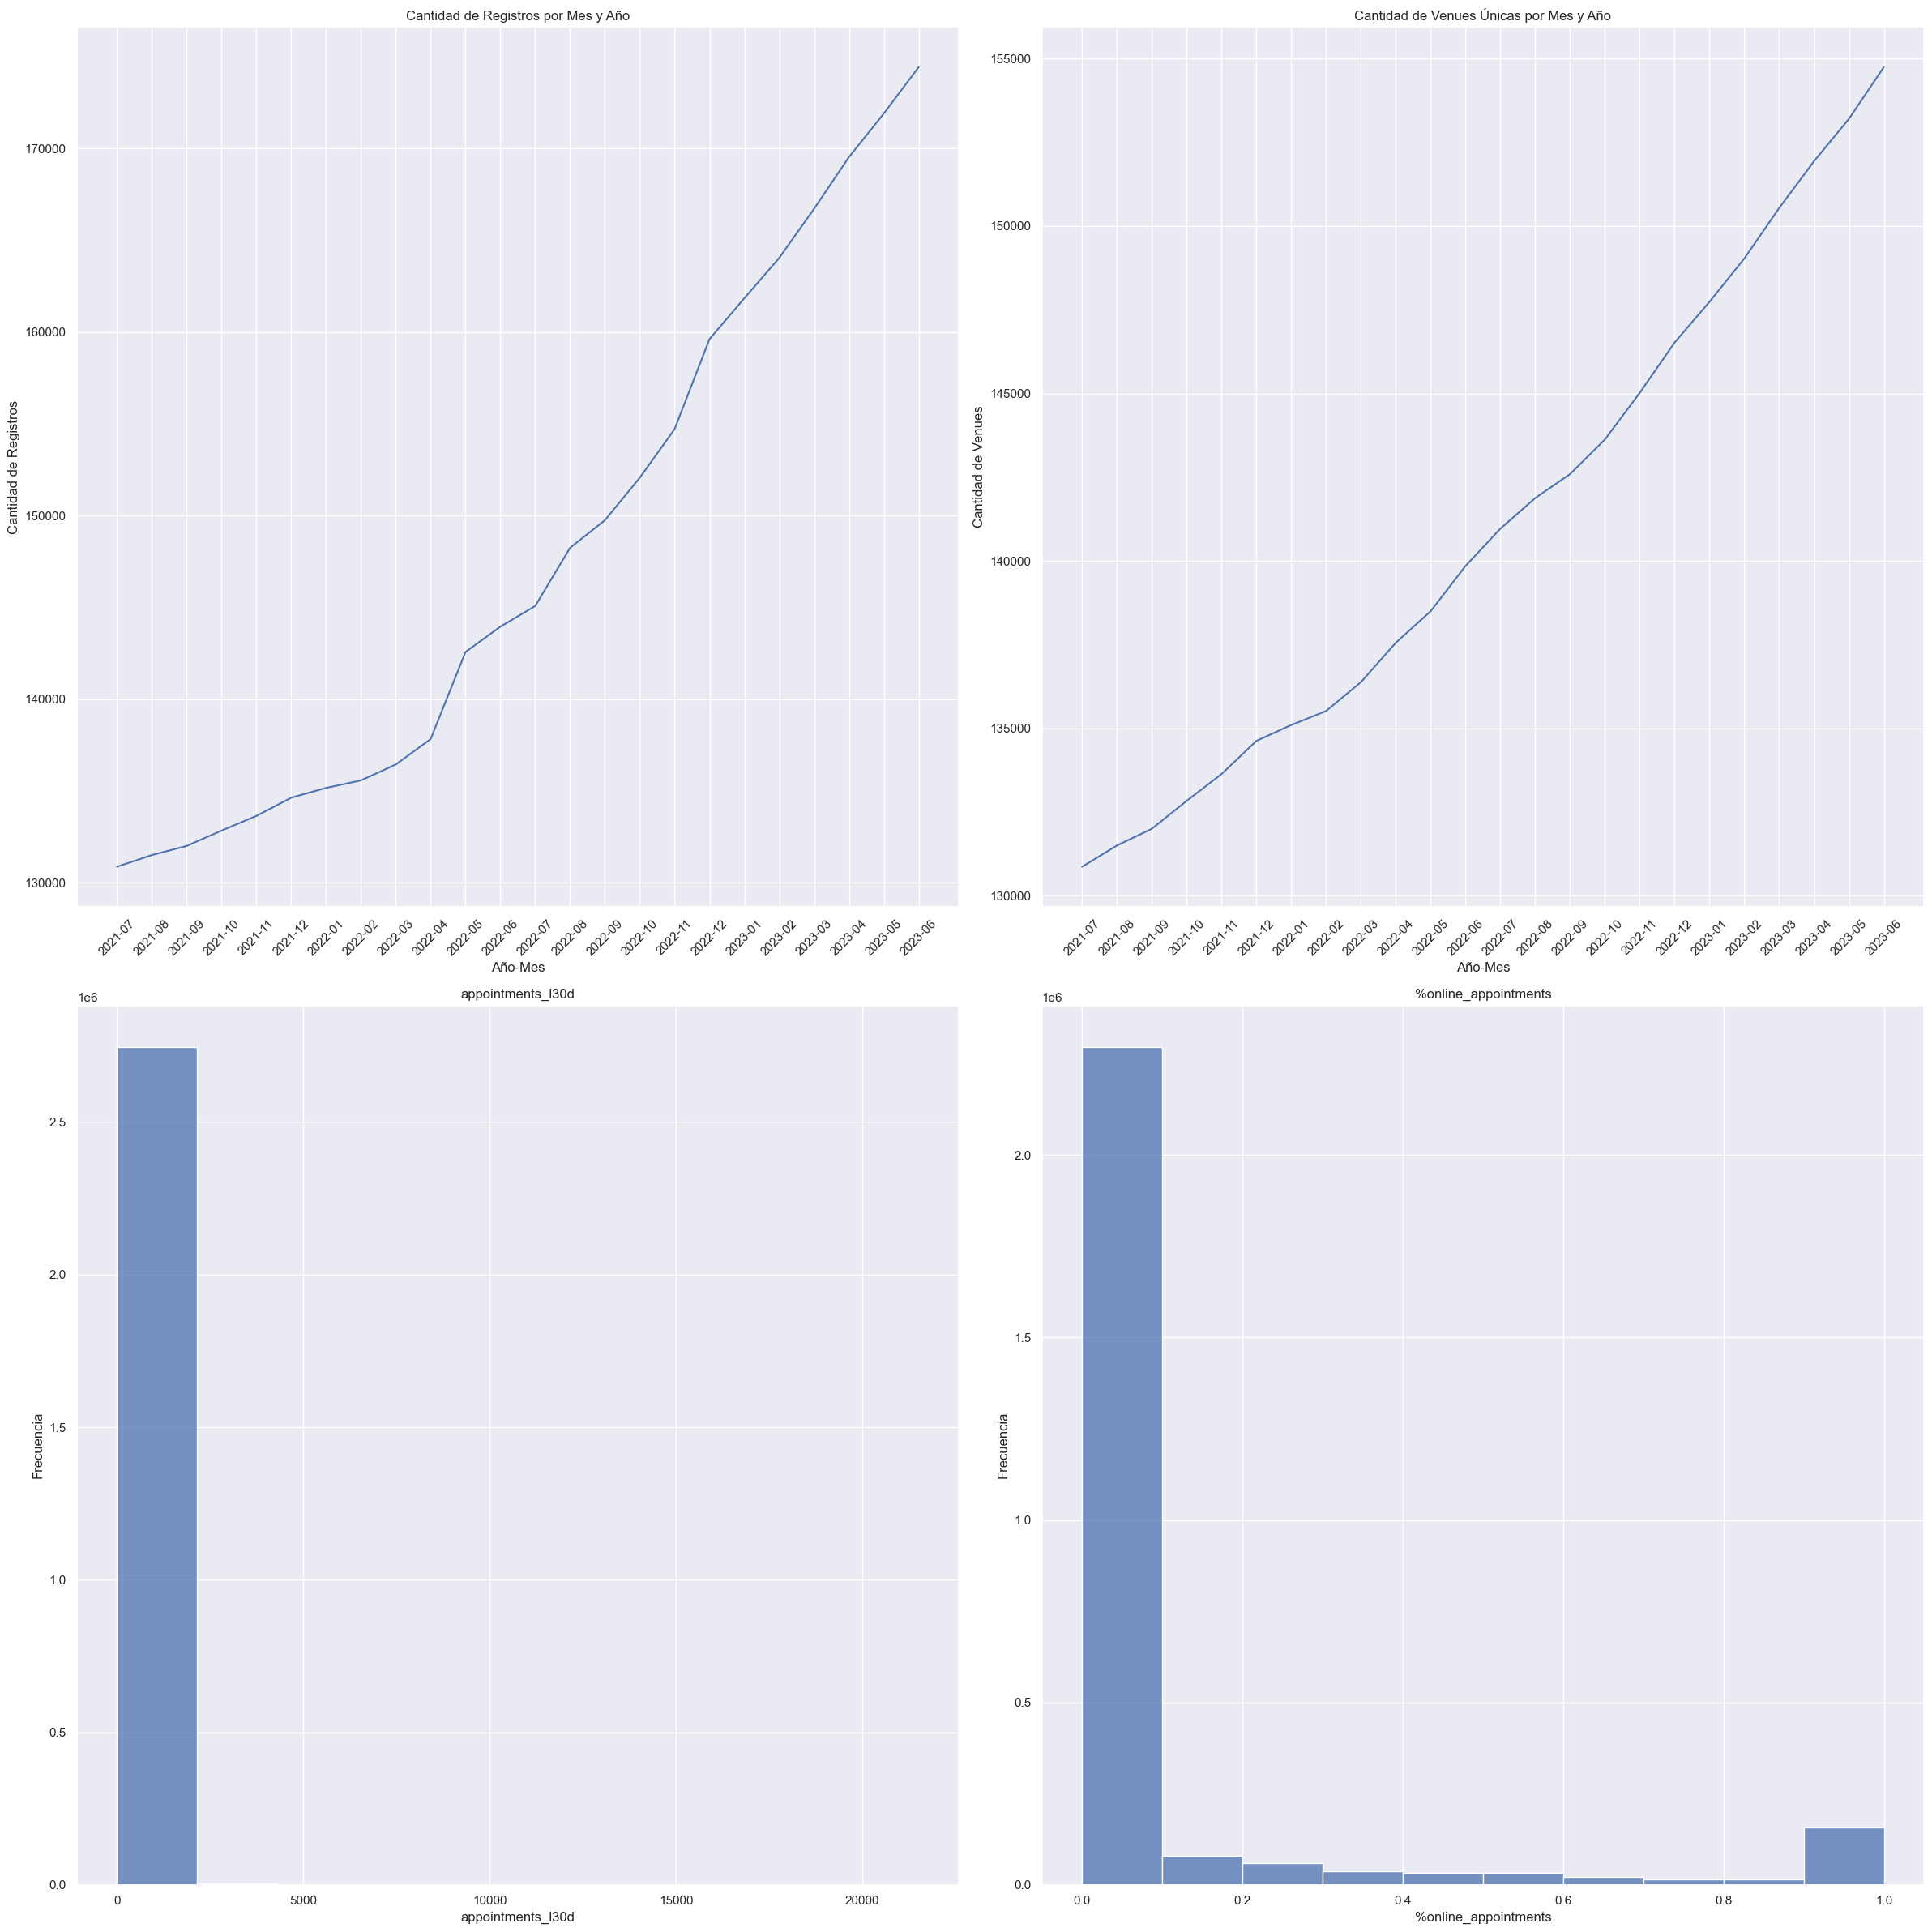

In [30]:
# Crear el conjunto de figuras
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 24))

# Crear el gráfico de la variable date_day
df_venues['YearMonth'] = df_venues['date_day'].dt.to_period('M')
count_by_year_month = df_venues['YearMonth'].value_counts().sort_index()
sns.lineplot(x=count_by_year_month.index.astype(str), y=count_by_year_month.values, ax=ax1)
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Cantidad de Registros')
ax1.set_title('Cantidad de Registros por Mes y Año')
ax1.tick_params(axis='x', rotation=45)

# Crear el gráfico de la variable unique_venue_id
venues_count_by_year_month = df_venues.groupby('YearMonth')['unique_venue_id'].nunique()
sns.lineplot(x=venues_count_by_year_month.index.astype(str), y=venues_count_by_year_month.values, ax=ax2)
ax2.set_xlabel('Año-Mes')
ax2.set_ylabel('Cantidad de Venues')
ax2.set_title('Cantidad de Venues Únicas por Mes y Año')
ax2.tick_params(axis='x', rotation=45)

# Crear el gráfico de la variable appointments_l30d
appointments = df_venues["appointments_l30d"].dropna()
sns.histplot(appointments, bins=10, ax=ax3)
ax3.set_ylabel("Frecuencia")
ax3.set_title("appointments_l30d")

# Crear el gráfico de la variable %online_appointments
online_appointments = df_venues["%online_appointments"].dropna()
sns.histplot(online_appointments, bins=10, ax=ax4)
ax4.set_ylabel("Frecuencia")
ax4.set_title("%online_appointments")

# Ajustar el diseño de la figura
fig.tight_layout()

### Dataset Orders

#### Variables Categóricas

In [31]:
orders_cat = df_orders[["content_channel_name", "online_order_segment", "payment_method_name", "saas_product"]]

print("Porcentaje de valores NaN:")
print(orders_cat.isna().mean()*100)
print()

for column in orders_cat:
    unique_values = df_orders[column].unique()
    print("Valores únicos de la variable '{}':".format(column))
    print(unique_values)
    print()

Porcentaje de valores NaN:
content_channel_name    0.0
online_order_segment    0.0
payment_method_name     0.0
saas_product            0.0
dtype: float64

Valores únicos de la variable 'content_channel_name':
['Marketplace' 'Widget' 'Book With Google']

Valores únicos de la variable 'online_order_segment':
['4.Loyal' '3.Explorer' '2.Referral' '1.Newbie']

Valores únicos de la variable 'payment_method_name':
['Pay at venue' 'iDeal_intent' 'PayPal' 'Apple Pay' 'iDeal' 'Credit Card'
 'Google Pay' 'Discount code' 'nan' 'Gift Card' 'Bancontact' 'SOFORT'
 'Credit Note' 'Treatwell Goodwill']

Valores únicos de la variable 'saas_product':
['tw_pro' 'tw_connect']



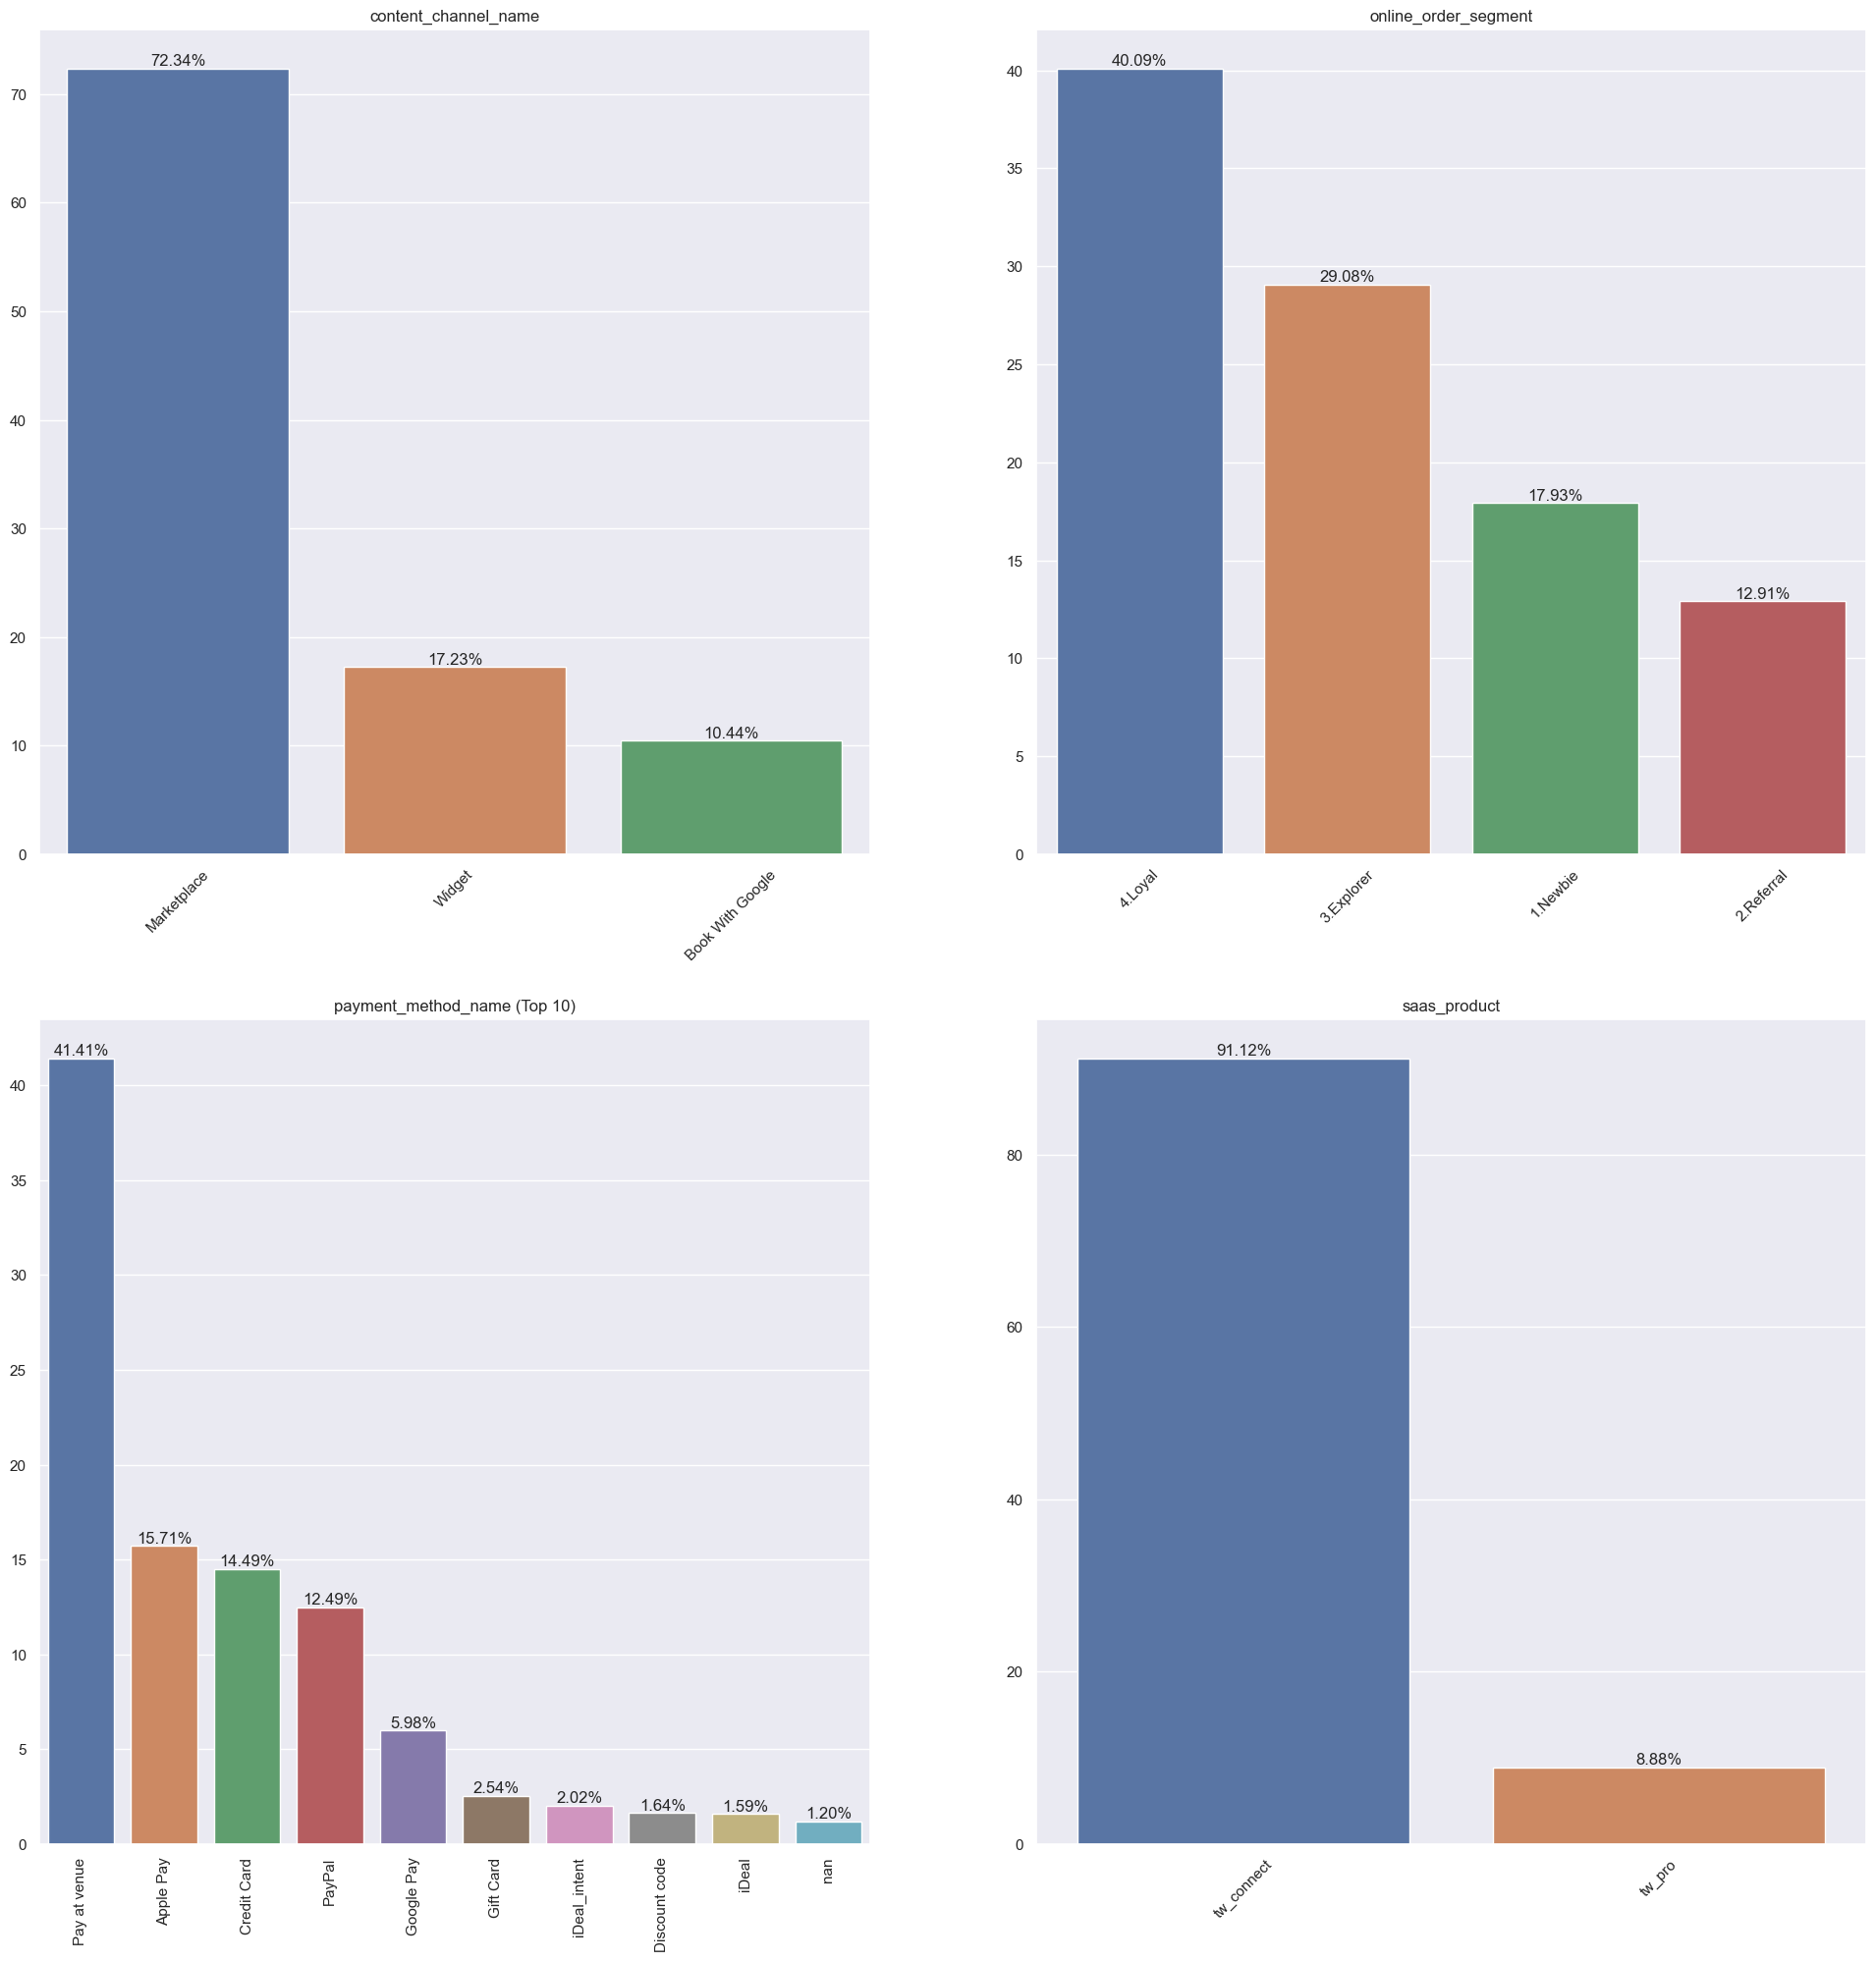

In [32]:
# Crear el conjunto de figuras
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 24))

# Crear el gráfico de la variable content_channel_name
content_channel_name = df_orders['content_channel_name'].value_counts(normalize=True) * 100
sns.barplot(x=content_channel_name.index, y=content_channel_name.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("content_channel_name")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable online_order_segment
online_order_segment = df_orders['online_order_segment'].value_counts(normalize=True) * 100
sns.barplot(x=online_order_segment.index, y=online_order_segment.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("online_order_segment")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable payment_method_name
payment_method_name = df_orders['payment_method_name'].value_counts(normalize=True) * 100
top_10_categories = payment_method_name[:10]
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_title("payment_method_name (Top 10)")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable saas_product
saas_product = df_orders['saas_product'].value_counts(normalize=True) * 100
sns.barplot(x=saas_product.index, y=saas_product.values, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_title("saas_product")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

Ahora eliminaremos la variable **saas_product** ya que también la tenemos en el dataset de las venues.

In [33]:
# Eliminar la variable
df_orders = df_orders.drop("saas_product", axis=1)

#### Variables Numéricas

In [34]:
orders_num = df_orders[["year", "month", "gross_orders", "gross_item_eur_amount_ttv", "gross_aov", "gross_revenue_eur", "gross_take_rate",
                        "cancelled_orders", "cancelled_item_eur_amount_ttv", "cancelled_aov", "cancelled_revenue_eur", "cancelled_take_rate"]]

print("Porcentaje de valores NaN:")
print(orders_num.isna().mean()*100)
print()

orders_num.describe()

Porcentaje de valores NaN:
year                             0.0
month                            0.0
gross_orders                     0.0
gross_item_eur_amount_ttv        0.0
gross_aov                        0.0
gross_revenue_eur                0.0
gross_take_rate                  0.0
cancelled_orders                 0.0
cancelled_item_eur_amount_ttv    0.0
cancelled_aov                    0.0
cancelled_revenue_eur            0.0
cancelled_take_rate              0.0
dtype: float64



,year,month,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
count,5.020284e+06,5.020284e+06,5.020284e+06,5.020284e+06,5.020284e+06,5.020284e+06,5.020284e+06,5020284.0,5.020284e+06,5.020284e+06,5.020284e+06,5.020284e+06
mean,2.021941e+03,6.494978e+00,6.273831e+00,2.667570e+02,4.672899e+01,2.387148e+01,1.381137e-01,1.032906,4.754788e+01,1.722579e+01,5.228184e+00,4.769562e-02
std,7.013594e-01,3.393777e+00,1.801482e+01,7.576655e+02,3.679389e+01,6.822262e+01,1.580773e-01,3.678864,1.731742e+02,3.323810e+01,2.375926e+01,1.148674e-01
min,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,4.000000e+00,1.000000e+00,4.056850e+01,2.723885e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.022000e+03,6.000000e+00,2.000000e+00,8.693250e+01,3.950000e+01,2.880000e+00,2.000000e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.022000e+03,9.000000e+00,5.000000e+00,2.160000e+02,5.750000e+01,2.056000e+01,3.499912e-01,1.0,4.000000e+01,3.000000e+01,0.000000e+00,0.000000e+00
max,2.023000e+03,1.200000e+01,2.030000e+03,1.173119e+05,2.067200e+04,4.094380e+03,5.000000e-01,574.0,1.557850e+04,1.110000e+04,3.885000e+03,5.000000e-01


Ahora vamos a analizar las variables **numéricas** para verificar que no contienen **valores imposibles**.

In [35]:
variables = ['gross_orders','gross_item_eur_amount_ttv', 'gross_aov', 'gross_revenue_eur', 'gross_take_rate', 'cancelled_orders',
             'cancelled_item_eur_amount_ttv', 'cancelled_aov', 'cancelled_revenue_eur', 'cancelled_take_rate']

# Crear una lista de tuplas con el nombre de la variable y el porcentaje de registros que cumplen la condición
tabla = []
total_registros = len(df_orders)

for variable in variables:
    cumplen_condicion = len(df_orders[df_orders[variable] < 0])
    porcentaje_cumplen_condicion = cumplen_condicion / total_registros * 100
    tabla.append((variable, porcentaje_cumplen_condicion))

# Imprimir la tabla
print("Variable\tPorcentaje de cumplimiento")
for variable, porcentaje in tabla:
    print("{}\t\t{:.2f}%".format(variable, porcentaje))

Variable	Porcentaje de cumplimiento
gross_orders		0.00%
gross_item_eur_amount_ttv		0.00%
gross_aov		0.00%
gross_revenue_eur		0.00%
gross_take_rate		0.00%
cancelled_orders		0.00%
cancelled_item_eur_amount_ttv		0.00%
cancelled_aov		0.00%
cancelled_revenue_eur		0.00%
cancelled_take_rate		0.00%


Ahora vamos a combinar y transofrmar las siguientes variables para obtener más información:

- **gross_orders - cancelled_orders:** Obtendremos la variable **net_orders**.
- **cancelled_orders / gross_orders:** Obtendremos la variable **orders_cancellation_rate**.
- **gross_aov - cancelled_aov:** Obtendremos la variable **AOV**.

Además, también vamos a eliminar las siguientes variables:
- **gross_item_eur_amount_ttv:**
- **cancelled_item_eur_amount_ttv:**

In [36]:
# Crear las variables
df_orders["net_orders"] = df_orders["gross_orders"] - df_orders["cancelled_orders"]
df_orders["orders_cancellation_rate"] = df_orders["cancelled_orders"] / df_orders["gross_orders"]
df_orders["AOV"] = df_orders["gross_aov"] - df_orders["cancelled_aov"]


# Eliminar las variables
df_orders = df_orders.drop("gross_orders", axis=1)
df_orders = df_orders.drop("cancelled_orders", axis=1)
df_orders = df_orders.drop("gross_item_eur_amount_ttv", axis=1)
df_orders = df_orders.drop("cancelled_item_eur_amount_ttv", axis=1)
df_orders = df_orders.drop("gross_aov", axis=1)
df_orders = df_orders.drop("cancelled_aov", axis=1)

Ahora vamos a visualizar nuevamente el porcentaje de **valores NaN** y las **estadísticas** de las nuevas variables.

In [37]:
orders_num = df_orders[["year", "month", "net_orders", "orders_cancellation_rate", "AOV", "gross_take_rate", "cancelled_take_rate"]]

print("Porcentaje de valores NaN:")
print(orders_num.isna().mean()*100)
print()

orders_num.describe()

Porcentaje de valores NaN:
year                        0.0
month                       0.0
net_orders                  0.0
orders_cancellation_rate    0.0
AOV                         0.0
gross_take_rate             0.0
cancelled_take_rate         0.0
dtype: float64



,year,month,net_orders,orders_cancellation_rate,AOV,gross_take_rate,cancelled_take_rate
count,5.020284e+06,5.020284e+06,5020284.0,5020284.0,5.020284e+06,5.020284e+06,5.020284e+06
mean,2.021941e+03,6.494978e+00,5.240924,0.15808,2.950320e+01,1.381137e-01,4.769562e-02
std,7.013594e-01,3.393777e+00,15.24845,0.289629,4.069191e+01,1.580773e-01,1.148674e-01
min,2.021000e+03,1.000000e+00,0.0,0.0,-4.944731e+03,0.000000e+00,0.000000e+00
25%,2.021000e+03,4.000000e+00,1.0,0.0,4.666667e-01,0.000000e+00,0.000000e+00
50%,2.022000e+03,6.000000e+00,2.0,0.0,2.500000e+01,2.000000e-02,0.000000e+00
75%,2.022000e+03,9.000000e+00,4.0,0.2,4.636400e+01,3.499912e-01,0.000000e+00
max,2.023000e+03,1.200000e+01,2022.0,1.0,2.067200e+04,5.000000e-01,5.000000e-01


Podemos ver que la variable **AOV** contiene valores negativos.

Al no poder ser, vamos a mirar la cantidad de registros que cumplen esta condición y, si no son muchos, los eliminaremos.

In [38]:
variables = ['AOV']

# Crear una lista de tuplas con el nombre de la variable y el porcentaje de registros que cumplen la condición
tabla = []

for variable in variables:
    cumplen_condicion = (df_orders[variable] < 0).mean() * 100
    tabla.append((variable, cumplen_condicion))

# Imprimir la tabla
print("Variable\tPorcentaje de cumplimiento")
for variable, porcentaje in tabla:
    print("{}\t\t{:.2f}%".format(variable, porcentaje))


Variable	Porcentaje de cumplimiento
AOV		14.75%


Podemos ver que el porcentaje de registros con errores es **relativamente alto**, no obstante, los vamos a eliminar.

In [39]:
# Eliminar los registros erroneos
condicion = (df_orders.AOV >= 0) | df_orders.AOV.isna()

df_orders = df_orders[condicion]

orders_num = df_orders[["year", "month", "net_orders", "orders_cancellation_rate", "AOV", "gross_take_rate", "cancelled_take_rate"]]

print("Porcentaje de valores NaN:")
print(orders_num.isna().mean()*100)
print()

orders_num.describe()

Porcentaje de valores NaN:
year                        0.0
month                       0.0
net_orders                  0.0
orders_cancellation_rate    0.0
AOV                         0.0
gross_take_rate             0.0
cancelled_take_rate         0.0
dtype: float64



,year,month,net_orders,orders_cancellation_rate,AOV,gross_take_rate,cancelled_take_rate
count,4.279939e+06,4.279939e+06,4279939.0,4279939.0,4.279939e+06,4.279939e+06,4.279939e+06
mean,2.021945e+03,6.489475e+00,3.660551,0.130958,3.692764e+01,1.398857e-01,3.382162e-02
std,7.015883e-01,3.397182e+00,10.047937,0.293657,3.844320e+01,1.579458e-01,9.911900e-02
min,2.021000e+03,1.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,4.000000e+00,1.0,0.0,1.243670e+01,0.000000e+00,0.000000e+00
50%,2.022000e+03,6.000000e+00,1.0,0.0,3.100000e+01,2.000000e-02,0.000000e+00
75%,2.022000e+03,9.000000e+00,3.0,0.0,5.050000e+01,3.499920e-01,0.000000e+00
max,2.023000e+03,1.200000e+01,2022.0,1.0,2.067200e+04,5.000000e-01,5.000000e-01


Ahora aplicaremos las siguientes **transformaciónes** para intentar obtener más información de las **variables a explorar**:
- **net_orders_category:** Segmentaremos la variable net_orders en distintos grupos para poder determinar si la venue ha tenido un mes con pocos o muchos pedidos.
- **monthly_cancelation_rate:** Obtendremos el ratio de cancelaciones de cada venue por mes.


In [40]:
# Crear la variable net_orders_category
net_orders_month = df_orders.groupby(["unique_venue_id", "year", "month"])["net_orders"].sum().reset_index(name="net_orders_per_month")

def categorize_orders(net_orders):
    if net_orders == 0:
        return "Sin pedidos"
    elif 0 < net_orders <= 70:
        return "Pocos pedidos"
    elif 70 < net_orders <= 170:
        return "Pedidos moderados"
    elif net_orders > 170:
        return "Muchos pedidos"
    else:
        return "Error"

net_orders_month["net_orders_category"] = net_orders_month["net_orders_per_month"].apply(categorize_orders)

# Unir los DataFrames
df_orders = pd.merge(df_orders, net_orders_month, on=["unique_venue_id", "year", "month"], how="inner")
df_orders


,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,gross_revenue_eur,gross_take_rate,cancelled_revenue_eur,cancelled_take_rate,net_orders,orders_cancellation_rate,AOV,net_orders_per_month,net_orders_category
0,12000021750,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,3.0,0.25,0.000000,19.0,Pocos pedidos
1,12000021750,2022.0,11.0,Widget,2.Referral,Pay at venue,0.00,0.00,0.00,0.00,11.0,0.0,24.727273,19.0,Pocos pedidos
2,12000021750,2022.0,11.0,Marketplace,2.Referral,Pay at venue,0.00,0.00,0.00,0.00,1.0,0.0,30.000000,19.0,Pocos pedidos
3,12000021750,2022.0,11.0,Widget,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,4.0,0.333333,0.000000,19.0,Pocos pedidos
4,11000386404,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,514.0,0.083779,0.948059,943.0,Muchos pedidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279934,11000312094,2023.0,3.0,Marketplace,3.Explorer,PayPal,0.00,0.00,0.00,0.00,1.0,0.0,30.000000,1.0,Pocos pedidos
4279935,12000013316,2023.0,2.0,Marketplace,3.Explorer,Credit Card,13.75,0.25,0.00,0.00,1.0,0.0,55.000000,1.0,Pocos pedidos
4279936,12000019912,2022.0,11.0,Marketplace,3.Explorer,Pay at venue,10.50,0.25,10.50,0.25,0.0,1.0,0.000000,0.0,Sin pedidos
4279937,12000016786,2022.0,5.0,Marketplace,3.Explorer,Pay at venue,11.25,0.25,11.25,0.25,0.0,1.0,0.000000,0.0,Sin pedidos


In [41]:
# Crear la variable monthly_cancelation_rate
monthly_cancellation_rate = df_orders.groupby(["unique_venue_id", "year", "month"])["orders_cancellation_rate"].mean()
df_orders["monthly_cancellation_rate"] = df_orders.set_index(["unique_venue_id", "year", "month"]).index.map(monthly_cancellation_rate)
df_orders

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,gross_revenue_eur,gross_take_rate,cancelled_revenue_eur,cancelled_take_rate,net_orders,orders_cancellation_rate,AOV,net_orders_per_month,net_orders_category,monthly_cancellation_rate
0,12000021750,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,3.0,0.25,0.000000,19.0,Pocos pedidos,0.145833
1,12000021750,2022.0,11.0,Widget,2.Referral,Pay at venue,0.00,0.00,0.00,0.00,11.0,0.0,24.727273,19.0,Pocos pedidos,0.145833
2,12000021750,2022.0,11.0,Marketplace,2.Referral,Pay at venue,0.00,0.00,0.00,0.00,1.0,0.0,30.000000,19.0,Pocos pedidos,0.145833
3,12000021750,2022.0,11.0,Widget,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,4.0,0.333333,0.000000,19.0,Pocos pedidos,0.145833
4,11000386404,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,0.00,0.00,0.00,0.00,514.0,0.083779,0.948059,943.0,Muchos pedidos,0.048174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279934,11000312094,2023.0,3.0,Marketplace,3.Explorer,PayPal,0.00,0.00,0.00,0.00,1.0,0.0,30.000000,1.0,Pocos pedidos,0.0
4279935,12000013316,2023.0,2.0,Marketplace,3.Explorer,Credit Card,13.75,0.25,0.00,0.00,1.0,0.0,55.000000,1.0,Pocos pedidos,0.0
4279936,12000019912,2022.0,11.0,Marketplace,3.Explorer,Pay at venue,10.50,0.25,10.50,0.25,0.0,1.0,0.000000,0.0,Sin pedidos,1.0
4279937,12000016786,2022.0,5.0,Marketplace,3.Explorer,Pay at venue,11.25,0.25,11.25,0.25,0.0,1.0,0.000000,0.0,Sin pedidos,1.0


/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/uri/anaconda3/envs/ub_master/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

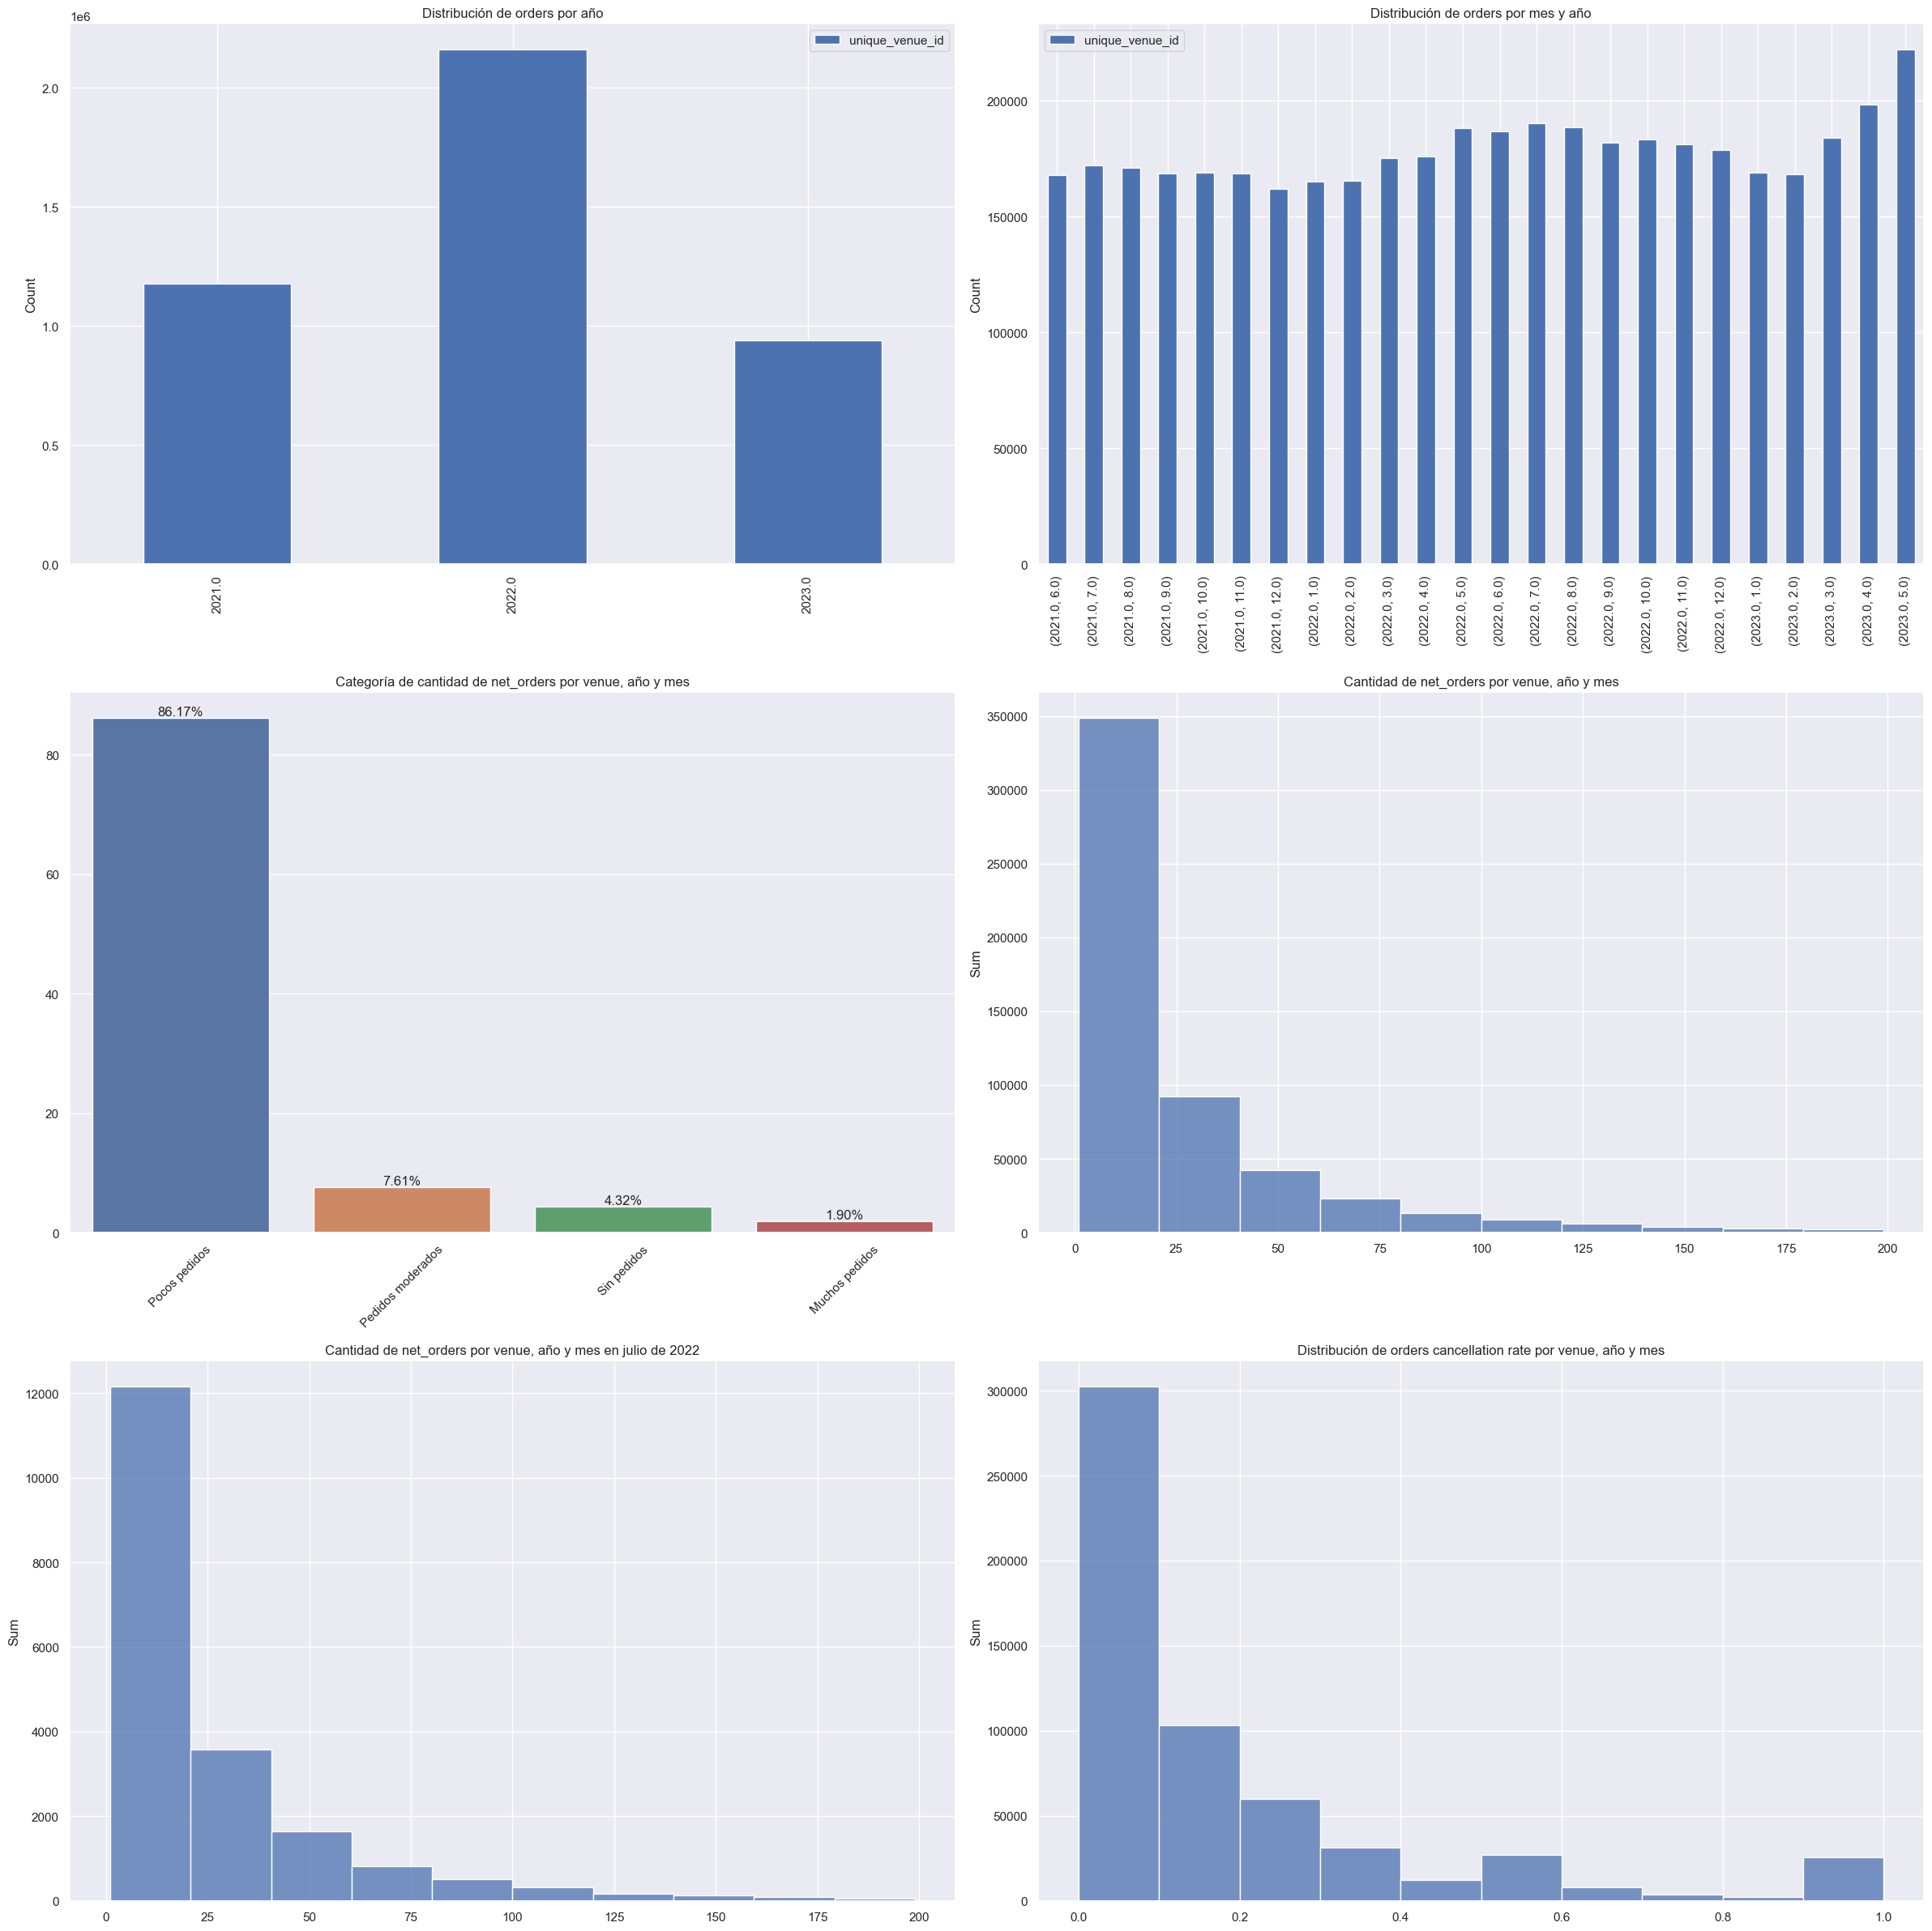

In [42]:
# Crear el conjunto de figuras
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(24, 24))

# Crear el gráfico de la variable year
year_df_orders = df_orders.groupby(['year'])['unique_venue_id'].count().reset_index().set_index(['year'])
year_df_orders.plot.bar(ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Count')
ax1.set_title("Distribución de orders por año")

# Crear el gráfico de la variable month
year_month_df_orders= df_orders.groupby(['year', "month"])['unique_venue_id'].count().reset_index().set_index(['year', "month"])
year_month_df_orders.plot.bar(ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Count')
ax2.set_title("Distribución de orders por mes y año")

# Crear el gráfico de la clasificación de orders por venue, año y mes
orders_category = net_orders_month.net_orders_category.value_counts(normalize=True) * 100
sns.barplot(x=orders_category.index, y=orders_category.values, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Categoría de cantidad de net_orders por venue, año y mes")

# Agregar el porcentaje en la parte superior de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de cantidad de orders por venue, año y mes
net_orders_month_slice = net_orders_month[(net_orders_month["net_orders_per_month"] > 0) & (net_orders_month["net_orders_per_month"] < 200)]
sns.histplot(net_orders_month_slice.net_orders_per_month, bins = 10, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('Sum')
ax4.set_title("Cantidad de net_orders por venue, año y mes")

# Crear el gráfico de la cantidad de orders por venue, año y mes en un periodo de tiempo concreto
net_orders_month_slice_2 = net_orders_month[(net_orders_month["net_orders_per_month"] > 0) & (net_orders_month["net_orders_per_month"] < 200) & (net_orders_month["year"] == 2022) & (net_orders_month["month"] == 2)]
sns.histplot(net_orders_month_slice_2.net_orders_per_month, bins = 10, ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('Sum')
ax5.set_title("Cantidad de net_orders por venue, año y mes en julio de 2022")

# Crear el gráfico de la variable orders_cancellation_rate
abc = monthly_cancellation_rate.reset_index(name="monthly_cancellation_rate")
sns.histplot(abc.monthly_cancellation_rate, bins = 10, ax=ax6)
ax6.set_xlabel('')
ax6.set_ylabel('Sum')
ax6.set_title("Distribución de orders cancellation rate por venue, año y mes")

# Ajustar el diseño de la figura
fig.tight_layout()

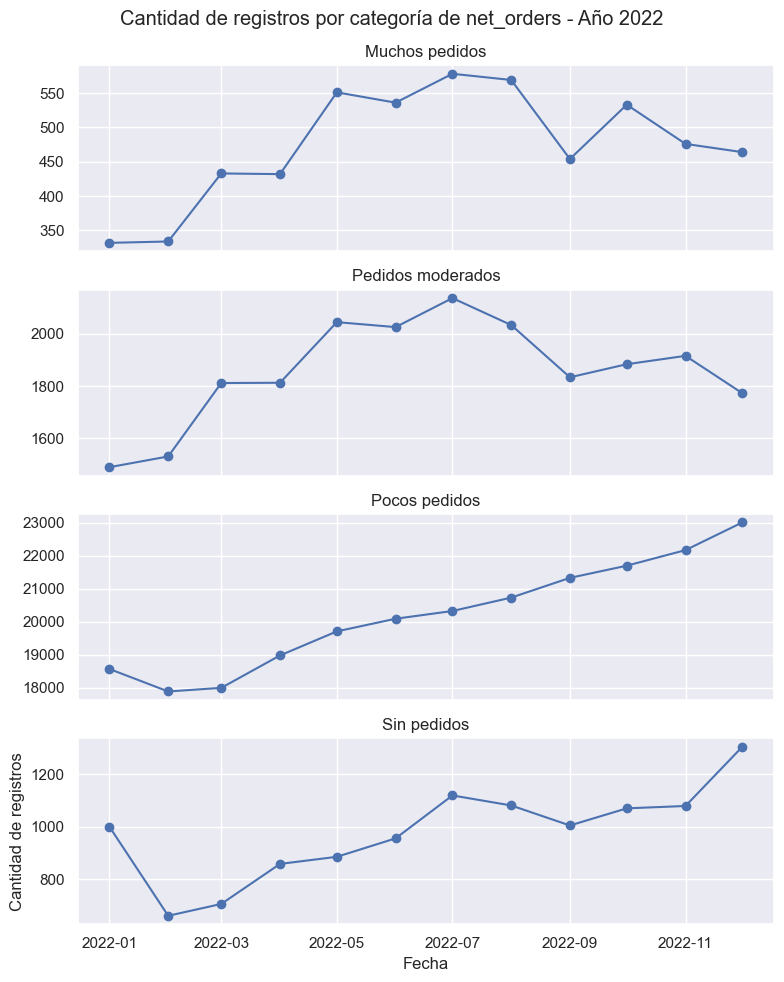

In [43]:
net_orders_month['date'] = pd.to_datetime(net_orders_month[['year', 'month']].assign(day=1))

# Filtrar el dataset por el año 2022
df_2022 = net_orders_month[net_orders_month['year'] == 2022]

# Dividir el dataset filtrado por categoría
df_2022_categories = df_2022.groupby('net_orders_category')

# Configurar los títulos de los gráficos
titles = ['Muchos pedidos', 'Pedidos moderados', 'Pocos pedidos', 'Sin pedidos']

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
fig.suptitle('Cantidad de registros por categoría de net_orders - Año 2022')

# Iterar por cada categoría y crear el gráfico de líneas correspondiente
for i, (category, df_category) in enumerate(df_2022_categories):
    # Agrupar los registros por fecha y obtener el conteo de registros
    grouped_data = df_category.groupby('date').size()
    x_values = grouped_data.index
    y_values = grouped_data.values

    # Crear el gráfico de líneas
    axes[i].plot(x_values, y_values, marker='o')
    axes[i].set_title(titles[i])

# Configurar los ejes
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')

# Ajustar los espacios entre los gráficos
plt.tight_layout()